In [1]:
# The code in this cell is provided by the CoinMarketCap API documentations

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from dotenv import load_dotenv

load_dotenv() #load environment variables from .envfile

API_KEY = os.getenv('API_KEY')
url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50', 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-03-21T21:30:52.978Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': "You have used 137% of your plan's daily credit limit.", 'total_count': 9063}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capit

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.932404e+07,1.932404e+07,NaN,1,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,27990.516707,3.646844e+10,-20.0615,-0.450430,-0.498308,14.618319,14.022883,25.712302,66.640510,5.408899e+11,45.9642,5.878009e+11,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1792.882036,1.093884e+10,-1.6870,0.087820,1.887356,6.154492,6.407021,9.378030,47.987525,2.194019e+11,18.6434,2.194019e+11,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
2,825,Tether,USDT,tether,49826,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.685642e+10,8.009174e+10,NaN,3,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1.000250,5.023120e+10,-8.6959,-0.000989,-0.131876,-0.239212,0.001336,0.005252,0.019201,7.687565e+10,6.5324,8.011177e+10,NaN,2023-03-21T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 21:31:00.757898
3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578907e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,336.727355,6.417409e+08,-4.8544,-0.336955,0.407601,9.483378,7.818099,11.696347,36.349709,5.316612e+10,4.5177,5.386963e+10,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
4,3408,USD Coin,USDC,usd-coin,11051,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.528949e+10,3.528949e+10,NaN,5,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.997295,5.209730e+09,-22.0558,0.032942,-0.080590,-0.133964,-0.267825,-0.312477,-0.274524,3.519403e+10,2.9912,3.519403e+10,NaN,2023-03-21T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 21:31:00.757898
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.466218,3.711255e+09,241.7421,-2.024387,23.121727,25.639564,20.028206,13.303907,35.248157,2.375425e+10,2.0185,4.662183e+10,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.471918e+10,3.559146e+10,NaN,7,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.370873,6.202038e+08,90.7357,0.600793,10.238862,8.964099,-7.631682,2.785059,47.511574,1.287642e+10,1.0942,1.668930e+10,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
7,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.076872,6.069536e+08,46.5231,0.542038,6.744979,4.350837,-11.769556,-10.258241,4.642615,1.019863e+10,0.8667,1.019863e+10,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
8,3890,Polygon,MATIC,polygon,622,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1.1

# Below is the function to run the API code

In [5]:
def api_runner():
    global df
    API_KEY = os.getenv('API_KEY')
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50', 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': API_KEY,
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      #print(e)
    
    # If the data is only kept in a DataFrame, the code here is used. I opted to save it in a CSV in my computer
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    
        df = pd.json_normalize(data['data'])
        df['timestamp']= pd.to_datetime('now')
        df

    if not os.path.isfile(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv'):
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', mode= 'a', header= False)

In [6]:
from time import time
from time import sleep

In [7]:
# The api can only be run 333 times as restricted by CoinMarketCap
for i in range(333):
    api_runner()
    print("API run successfully")
    sleep(60) #API runner will sleep for 60 seconds before running again
exit()

API run successfully
API run successfully
API run successfully


KeyboardInterrupt: 

In [8]:
df1 = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv')

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19324043.00000,19324043.00000,NaN,1,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,27990.51671,36468438958.07639,-20.06150,-0.45043,-0.49831,14.61832,14.02288,25.71230,66.64051,540889948437.80737,45.96420,587800850846.47998,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
1,1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1792.88204,10938835939.95141,-1.68700,0.08782,1.88736,6.15449,6.40702,9.37803,47.98753,219401906431.01251,18.64340,219401906431.01001,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
2,2,825,Tether,USDT,tether,49826,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1.00025,50231204175.61670,-8.69590,-0.00099,-0.13188,-0.23921,0.00134,0.00525,0.01920,76875649334.78589,6.53240,80111774148.45000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 21:31:00.757898
3,3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157890705.12470,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,336.72736,641740946.92646,-4.85440,-0.33696,0.40760,9.48338,7.81810,11.69635,36.34971,53166119571.66254,4.51770,53869630049.48000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
4,4,3408,USD Coin,USDC,usd-coin,11051,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35289490658.01458,35289490658.01458,NaN,5,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.99730,5209730230.19625,-22.05580,0.03294,-0.08059,-0.13396,-0.26782,-0.31248,-0.27452,35194034078.09309,2.99120,35194034078.09000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 21:31:00.757898
5,5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.46622,3711255204.83584,241.74210,-2.02439,23.12173,25.63956,20.02821,13.30391,35.24816,23754246677.14973,2.01850,46621827367.31000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
6,6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34719183649.74600,35591462141.75800,NaN,7,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.37087,620203805.70369,90.73570,0.60079,10.23886,8.96410,-7.63168,2.78506,47.51157,12876417543.51552,1.09420,16689297631.64000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
7,7,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.07687,606953612.52596,46.52310,0.54204,6.74498,4.35084,-11.76956,-10.25824,4.64262,10198631006.75398,0.86670,10198631006.75000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
8,8

In [11]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

Below I will be grouping by the different coins and calculating their average percent change for a given interval 

In [12]:
df2 = df1.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45043,-0.49831,14.61832,14.02288,25.71230,66.64051
Ethereum,0.08782,1.88736,6.15449,6.40702,9.37803,47.98753
Tether,-0.00099,-0.13188,-0.23921,0.00134,0.00525,0.01920
BNB,-0.33696,0.40760,9.48338,7.81810,11.69635,36.34971
USD Coin,0.03294,-0.08059,-0.13396,-0.26782,-0.31248,-0.27452
XRP,-2.02439,23.12173,25.63956,20.02821,13.30391,35.24816
Cardano,0.60079,10.23886,8.96410,-7.63168,2.78506,47.51157
Dogecoin,0.54204,6.74498,4.35084,-11.76956,-10.25824,4.64262
Polygon,0.18462,1.34928,-1.93047,-23.39146,13.19001,44.58170


In [13]:
df3 = df2.stack()
df3 = df3.to_frame(name = 'values')
df3

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.45043
                  quote.USD.percent_change_24h  -0.49831
                  quote.USD.percent_change_7d   14.61832
                  quote.USD.percent_change_30d  14.02288
                  quote.USD.percent_change_60d  25.71230
                  quote.USD.percent_change_90d  66.64051
Ethereum          quote.USD.percent_change_1h    0.08782
                  quote.USD.percent_change_24h   1.88736
                  quote.USD.percent_change_7d    6.15449
                  quote.USD.percent_change_30d   6.40702
                  quote.USD.percent_change_60d   9.37803
                  quote.USD.percent_change_90d  47.98753
Tether            quote.USD.percent_change_1h   -0.00099
                  quote.USD.percent_change_24h  -0.13188
                  quote.USD.percent_change_7d   -0.23921
                  quote.USD.percent_change_30d   0.00134
                  quote.USD.percent_change_60d   0.00525
                  quote.USD.percent_change_90d   0.01920
BNB               quote.USD.percent_change_1h   -0.33696
                  quote.USD.percent_change_24h   0.40760
                  quote.USD.percent_change_7d    9.48338
                  quote.USD.percent_change_30d   7.81810
                  quote.USD.percent_change_60d  11.69635
                  quote.USD.percent_change_90d  36.34971
USD Coin          quote.USD.percent_change_1h    0.03294
                  quote.USD.percent_change_24h  -0.08059
                  quote.USD.percent_change_7d   -0.13396
                  quote.USD.percent_change_30d  -0.26782
                  quote.USD.percent_change_60d  -0.31248
                  quote.USD.percent_change_90d  -0.27452
XRP               quote.USD.percent_change_1h   -2.02439
                  quote.USD.percent_change_24h  23.12173
                  quote.USD.percent_change_7d   25.63956
                  quote.USD.percent_change_30d  20.02821
                  quote.USD.percent_change_60d  13.30391
                  quote.USD.percent_change_90d  35.24816
Cardano           quote.USD.percent_change_1h    0.60079
                  quote.USD.percent_change_24h  10.23886
                  quote.USD.percent_change_7d    8.96410
                  quote.USD.percent_change_30d  -7.63168
                  quote.USD.percent_change_60d   2.78506
                  quote.USD.percent_change_90d  47.51157
Dogecoin          quote.USD.percent_change_1h    0.54204
                  quote.USD.percent_change_24h   6.74498
                  quote.USD.percent_change_7d    4.35084
                  quote.USD.percent_change_30d -11.76956
                  quote.USD.percent_change_60d -10.25824
                  quote.USD.percent_change_90d   4.64262
Polygon           quote.USD.percent_change_1h    0.18462
                  quote.USD.percent_change_24h   1.34928
                  quote.USD.percent_change_7d   -1.93047
                  quote.USD.percent_change_30d -23.39146
                  quote.USD.percent_change_60d  13.19001
                  quote.USD.percent_change_90d  44.58170
Solana            quote.USD.percent_change_1h   -0.12611
                  quote.USD.percent_change_24h  -0.45156
                  quote.USD.percent_change_7d    9.68855
                  quote.USD.percent_change_30d  -8.98606
                  quote.USD.percent_change_60d  -5.94898
                  quote.USD.percent_change_90d  87.10767
Binance USD       quote.USD.percent_change_1h    0.01135
                  quote.USD.percent_change_24h  -0.13327
                  quote.USD.percent_change_7d   -0.13742
                  quote.USD.percent_change_30d  -0.19556
                  quote.USD.percent_change_60d  -0.11854
                  quote.USD.percent_change_90d  -0.19848
Polkadot          quote.USD.percent_change_1h    2.13914
                  quote.USD.percent_change_24h   3.66703
                  quote.USD.percent_change_7d    4.13108
   

In [14]:
type(df3)

pandas.core.frame.DataFrame

In [15]:
index = pd.Index(range(int(df3.count())))
#df4 = df3.set_index(index)  --> ran this code first and then comment it out and reset the index in the dataframe
df4 = df3.reset_index()

In [16]:
df4.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45043
1,Bitcoin,quote.USD.percent_change_24h,-0.49831
2,Bitcoin,quote.USD.percent_change_7d,14.61832
3,Bitcoin,quote.USD.percent_change_30d,14.02288
4,Bitcoin,quote.USD.percent_change_60d,25.71230


In [17]:
# Rename the columns name from level_1 to percent_change
df4 = df4.rename(columns ={'level_1': 'percent_change'})
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45043
1,Bitcoin,quote.USD.percent_change_24h,-0.49831
2,Bitcoin,quote.USD.percent_change_7d,14.61832
3,Bitcoin,quote.USD.percent_change_30d,14.02288
4,Bitcoin,quote.USD.percent_change_60d,25.71230
5,Bitcoin,quote.USD.percent_change_90d,66.64051
6,Ethereum,quote.USD.percent_change_1h,0.08782
7,Ethereum,quote.USD.percent_change_24h,1.88736
8,Ethereum,quote.USD.percent_change_7d,6.15449
9,Ethereum,quote.USD.percent_change_30d,6.40702


In [18]:
## Since the names of the catagories of percent change in the grouped dataframe are long,
    ##I change it to shorter names which will help with the visualizations below
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']
                                   , ['1h', '24h', '7d', '30d', '60d', '90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,-0.45043
1,Bitcoin,24h,-0.49831
2,Bitcoin,7d,14.61832
3,Bitcoin,30d,14.02288
4,Bitcoin,60d,25.71230
5,Bitcoin,90d,66.64051
6,Ethereum,1h,0.08782
7,Ethereum,24h,1.88736
8,Ethereum,7d,6.15449
9,Ethereum,30d,6.40702


## Some Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

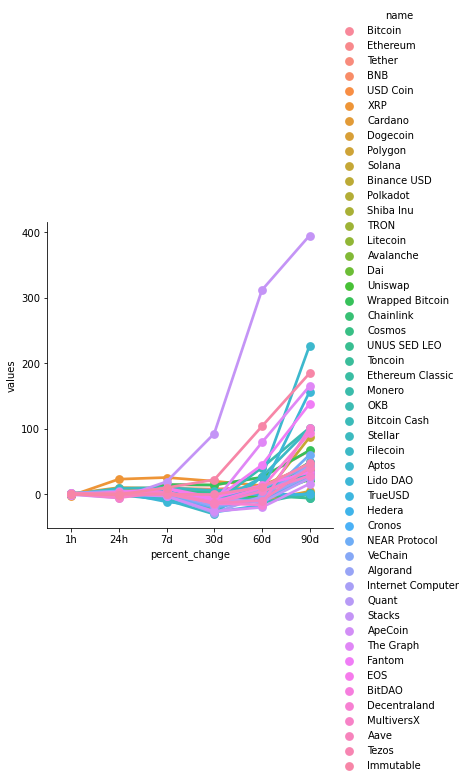

In [20]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df4, kind = 'point')

In [21]:
# Creating plots with specific columns

df5 = df1[['name','quote.USD.price','timestamp']]
df5 = df5.query(" name == ['Bitcoin'] ")
df5

,name,quote.USD.price,timestamp
0,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
50,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
100,Bitcoin,27990.51671,2023-03-21 21:31:00.757898


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

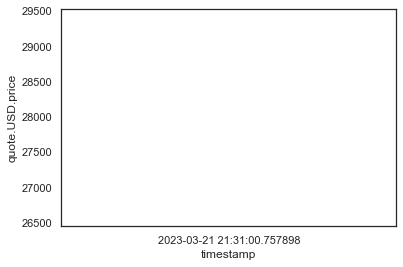

In [22]:
sns.set_theme(style="white")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df5)